In [375]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [94]:
kor_ticker = pd.read_pickle("./data/kor_ticker.pkl")
kor_fs = pd.read_pickle("./data/kor_fs.pkl")
kor_price = pd.read_pickle("./data/kor_price.pkl")
kor_sector = pd.read_pickle("./data/kor_sector.pkl")
kor_value = pd.read_pickle("./data/kor_value.pkl")

- 각 팩터의 값들은 재무제표(value, quality)나 가격데이터(momentum)로 구해야 한다
- price data는 2017-08-07 ~ 2022-08-05 기간의 코스피 코스닥 종목들 - 코스피만 사용

# Value

In [161]:
kor_ticker.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2513 entries, 0 to 2512
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   종목코드    2513 non-null   object 
 1   종목명     2513 non-null   object 
 2   시장구분    2513 non-null   object 
 3   종가      2513 non-null   float64
 4   시가총액    2513 non-null   float64
 5   기준일     2513 non-null   object 
 6   EPS     1593 non-null   float64
 7   선행EPS   574 non-null    float64
 8   BPS     2272 non-null   float64
 9   주당배당금   2465 non-null   float64
 10  종목구분    2513 non-null   object 
dtypes: float64(6), object(5)
memory usage: 216.1+ KB


코스피만 불러오기

In [162]:
kor_kospi = kor_ticker[kor_ticker['시장구분'] == 'KOSPI']
kor_kospi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 938 entries, 0 to 2511
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   종목코드    938 non-null    object 
 1   종목명     938 non-null    object 
 2   시장구분    938 non-null    object 
 3   종가      938 non-null    float64
 4   시가총액    938 non-null    float64
 5   기준일     938 non-null    object 
 6   EPS     628 non-null    float64
 7   선행EPS   308 non-null    float64
 8   BPS     791 non-null    float64
 9   주당배당금   910 non-null    float64
 10  종목구분    938 non-null    object 
dtypes: float64(6), object(5)
memory usage: 87.9+ KB


In [60]:
kor_value[kor_value['종목코드'] == '000020']

,종목코드,기준일,지표,값
0,000020,2022-08-03,DY,0.0170
1,000020,2022-08-03,PBR,0.8314
2,000020,2022-08-03,PCR,6.7597
3,000020,2022-08-03,PER,14.9532
4,000020,2022-08-03,PSR,0.9660


## value data frame
- DY : dividend
- PBR : book value
- PCR : cash flow
- PER : earing
- PSR : sales

In [163]:
value_table = pd.pivot_table(kor_value, index = '종목코드', columns = '지표').reset_index()
value_table.columns = ['종목코드', 'DY','PBR','PCR','PER','PSR']

In [104]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [166]:
data_value = pd.merge(kor_kospi[['종목코드','종목명','시장구분']], value_table ,on='종목코드')
data_value.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 792 entries, 0 to 791
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   종목코드    792 non-null    object 
 1   종목명     792 non-null    object 
 2   시장구분    792 non-null    object 
 3   DY      563 non-null    float64
 4   PBR     792 non-null    float64
 5   PCR     791 non-null    float64
 6   PER     791 non-null    float64
 7   PSR     743 non-null    float64
dtypes: float64(5), object(3)
memory usage: 55.7+ KB


가치지표가 0이하인 경우 nan처리

In [167]:
data_value.loc[data_value['DY'] <=0,'DY'] = np.nan
data_value.loc[data_value['PBR'] <=0,'PBR'] = np.nan
data_value.loc[data_value['PCR'] <=0,'PCR'] = np.nan
data_value.loc[data_value['PER'] <=0,'PER'] = np.nan
data_value.loc[data_value['PSR'] <=0,'PSR'] = np.nan

In [168]:
data_value

,종목코드,종목명,시장구분,DY,PBR,PCR,PER,PSR
0,000020,동화약품,KOSPI,0.0170,0.8314,6.7597,14.9532,0.9660
1,000040,KR모터스,KOSPI,NaN,1.3430,NaN,NaN,0.4828
2,000050,경방,KOSPI,0.0097,0.4666,9.8130,11.5126,0.8860
3,000060,메리츠화재,KOSPI,0.0172,1.9039,3.8105,5.6745,NaN
4,000070,삼양홀딩스,KOSPI,0.0414,0.2568,3.0723,2.6045,0.1923
...,...,...,...,...,...,...,...,...
787,378850,화승알앤에이,KOSPI,0.0073,1.1185,10.7267,NaN,0.1112
788,381970,케이카,KOSPI,0.0354,1.1185,NaN,NaN,NaN
789,383220,F&F,KOSPI,0.0069,12.5981,14.4357,18.4886,3.9780
790,383800,LX홀딩스,KOSPI,NaN,0.4810,NaN,3.0765,2.4815


In [169]:
value_rank = data_value[['PER','PBR']].rank(axis = 0)
value_sum = value_rank.sum(axis = 1, skipna = False).rank()
data_value.loc[value_sum <= 20, ['종목코드', '종목명', 'PER', 'PBR']]

,종목코드,종목명,PER,PBR
39,000880,한화,1.3062,0.1055
46,001040,CJ,2.7092,0.1386
63,001390,KG케미칼,1.4431,0.2173
89,001940,KISCO홀딩스,1.1537,0.1651
91,002030,아세아,1.4143,0.1617
246,006120,SK디스커버리,1.9001,0.2238
284,007860,서연,2.3993,0.1806
328,009970,영원무역홀딩스,1.2914,0.2135
421,016610,DB금융투자,2.1474,0.2121
435,017940,E1,1.9544,0.2208


전통적으로 PER와 PBR이 낮은 지주회사가 많이 분포되어 있다.

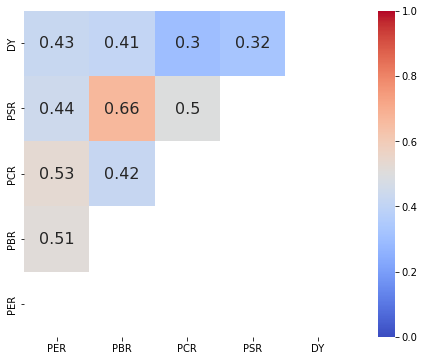

In [170]:


value_list_copy = data_value.copy()
value_list_copy['DY'] = 1 / value_list_copy['DY']
value_list_copy = value_list_copy[['PER', 'PBR', 'PCR', 'PSR', "DY"]]
value_rank_all = value_list_copy.rank(axis=0)
mask = np.triu(value_rank_all.corr())

fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(value_rank_all.corr(),
            annot=True,
            mask=mask,
            annot_kws={"size": 16},
            vmin=0,
            vmax=1,
            center=0.5,
            cmap='coolwarm',
            square=True)
ax.invert_yaxis()
plt.show()

- 팩터간 상관관계가 낮을 수록 good ~ 선형대수의 직교(orthogonality)에 가까울 수록


In [171]:
value_sum_all = value_rank_all.sum(axis=1, skipna=False).rank()
data_value.loc[value_sum_all <= 20]

,종목코드,종목명,시장구분,DY,PBR,PCR,PER,PSR
4,000070,삼양홀딩스,KOSPI,0.0414,0.2568,3.0723,2.6045,0.1923
8,000140,하이트진로홀딩스,KOSPI,0.0380,0.2536,0.9281,3.6280,0.1227
39,000880,한화,KOSPI,0.0264,0.1055,0.4383,1.3062,0.0401
46,001040,CJ,KOSPI,0.0294,0.1386,0.8642,2.7092,0.0640
63,001390,KG케미칼,KOSPI,0.0180,0.2173,1.2267,1.4431,0.0730
89,001940,KISCO홀딩스,KOSPI,0.0283,0.1651,1.5962,1.1537,0.1301
90,002020,코오롱,KOSPI,0.0216,0.3052,1.0309,1.6598,0.0588
91,002030,아세아,KOSPI,0.0242,0.1617,1.5127,1.4143,0.1423
129,002990,금호건설,KOSPI,0.0958,0.4872,1.8678,2.2622,0.1495
144,003300,한일홀딩스,KOSPI,0.0495,0.1774,2.2620,4.4796,0.1869


1. 위에서 구한 다섯개 지표들의 순위를 더한 후 다시 순위를 매긴다.
2. 최종 순위가 낮은 20 종목을 선택한다. 즉 하나의 지표보다 다섯개 지표가 골고루 낮은 종목을 선택한다.

단순 저PER, 저PBR 포트폴리오와 달리 지주회사가 아닌 종목들도 포함되어 있다.

# Momentum

### data 처리

In [128]:
pd.options.display.max_rows = 20
pd.options.display.max_columns = 20

In [172]:
kor_price

,날짜,시가,고가,저가,종가,거래량,종목코드
0,2017-08-07,8330.0,8410.0,8320.0,8380.0,35043.0,000020
1,2017-08-07,4836.0,4970.0,4783.0,4918.0,373437.0,000040
2,2017-08-07,15950.0,16150.0,15800.0,15950.0,26242.0,000050
3,2017-08-07,24300.0,24450.0,24150.0,24300.0,119111.0,000060
4,2017-08-07,116000.0,117500.0,114500.0,116000.0,8007.0,000070
...,...,...,...,...,...,...,...
2559956,2022-08-05,26600.0,26650.0,25750.0,26050.0,288182.0,399720
2559957,2022-08-05,27500.0,27750.0,26700.0,27150.0,170316.0,402030
2559958,2022-08-05,42300.0,42950.0,42000.0,42650.0,194975.0,402340
2559959,2022-08-05,53900.0,58800.0,53400.0,55500.0,408363.0,403870


종목코드를 columns으로하는 피벗테이블

In [175]:
price_pivot = pd.pivot_table(kor_price, index = '날짜', values='종가', columns='종목코드')
price_pivot

종목코드,000020,000040,000050,000060,000070,000080,000100,000120,000140,000150,...,389260,391710,396270,396300,397030,399720,402030,402340,403870,412350
날짜,,,,,,,,,,,,,,,,,,,,,
2017-08-07,8380.0,4918.0,15950.0,24300.0,116000.0,23650.0,36417.0,180000.0,11300.0,101224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-08,8330.0,4856.0,15650.0,24300.0,119000.0,23700.0,36980.0,172000.0,11200.0,102012.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-09,8150.0,4783.0,15350.0,24450.0,120000.0,23500.0,36900.0,171000.0,11200.0,104375.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-10,8200.0,4759.0,15300.0,24100.0,120000.0,23800.0,36498.0,174000.0,11400.0,105163.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-11,8130.0,4294.0,14850.0,24000.0,122500.0,23600.0,35936.0,168500.0,11150.0,103587.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01,10400.0,725.0,13000.0,34100.0,74100.0,30150.0,57200.0,114500.0,11750.0,70700.0,...,19700.0,2640.0,12350.0,7280.0,21000.0,26400.0,26000.0,42450.0,54900.0,12400.0
2022-08-02,10250.0,711.0,12950.0,33850.0,72800.0,30700.0,56700.0,113500.0,11650.0,69800.0,...,20000.0,2630.0,11850.0,7430.0,19800.0,26600.0,25800.0,41200.0,53500.0,12100.0
2022-08-03,10600.0,703.0,12850.0,36150.0,72500.0,31250.0,56300.0,115500.0,11850.0,71100.0,...,18450.0,2605.0,11850.0,7820.0,21400.0,27050.0,25850.0,41800.0,54700.0,12500.0


코스피 종목 가격만 뽑기

In [178]:
kor_kospi['종목코드']

0       000020
1       000040
2       000050
3       000060
4       000070
         ...  
2467    402340
2470    404990
2481    417310
2495    900140
2511    950210
Name: 종목코드, Length: 938, dtype: object

코스피 리스트에 존재하는 티커가 가격 리스트에 존재하면 price_exist 리스트에 append

In [196]:
kospi_list = list(kor_kospi['종목코드'].values)
price_list = list(price_pivot.columns)
price_exist = [i for i in kospi_list if i in price_list]

kospi 티커 중에 존재하는 가격데이터 총 792개

In [197]:
price_kospi = price_pivot[price_exist]
price_kospi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1229 entries, 2017-08-07 to 2022-08-05
Columns: 792 entries, 000020 to 402340
dtypes: float64(792)
memory usage: 7.4+ MB


### 모멘텀 종목 뽑기

In [187]:
price_kospi.pct_change().cumsum()

종목코드,000020,000040,000050,000060,000070,000080,000100,000120,000140,000150,...,363280,372910,373220,375500,377300,378850,381970,383220,383800,402340
날짜,,,,,,,,,,,,,,,,,,,,,
2017-08-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-08,-0.005967,-0.012607,-0.018809,0.000000,0.025862,0.002114,0.015460,-0.044444,-0.008850,0.007785,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-09,-0.027575,-0.027640,-0.037978,0.006173,0.034265,-0.006325,0.013296,-0.050258,-0.008850,0.030949,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-10,-0.021440,-0.032657,-0.041235,-0.008142,0.034265,0.006441,0.002402,-0.032715,0.009008,0.038498,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-11,-0.029977,-0.130367,-0.070647,-0.012291,0.055099,-0.001962,-0.012996,-0.064324,-0.012922,0.023512,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01,0.836074,-1.082541,0.114828,0.644446,-0.030707,0.480744,0.717643,-0.225213,0.318508,0.246163,...,-0.319441,-0.679694,-0.135205,-0.342305,-1.000435,-0.680306,0.002594,0.788398,-0.270708,-0.511458
2022-08-02,0.821651,-1.101851,0.110981,0.637114,-0.048251,0.498986,0.708902,-0.233946,0.309997,0.233433,...,-0.324832,-0.676065,-0.141164,-0.353201,-1.003708,-0.680306,0.133029,0.788398,-0.276402,-0.540905
2022-08-03,0.855797,-1.113103,0.103259,0.705061,-0.052372,0.516902,0.701847,-0.216325,0.327165,0.252058,...,-0.322122,-0.681490,-0.093203,-0.350753,-0.949521,-0.674466,0.092305,0.779023,-0.270675,-0.526342


In [199]:
price_kospi

종목코드,000020,000040,000050,000060,000070,000080,000100,000120,000140,000150,...,363280,372910,373220,375500,377300,378850,381970,383220,383800,402340
날짜,,,,,,,,,,,,,,,,,,,,,
2017-08-07,8380.0,4918.0,15950.0,24300.0,116000.0,23650.0,36417.0,180000.0,11300.0,101224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-08,8330.0,4856.0,15650.0,24300.0,119000.0,23700.0,36980.0,172000.0,11200.0,102012.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-09,8150.0,4783.0,15350.0,24450.0,120000.0,23500.0,36900.0,171000.0,11200.0,104375.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-10,8200.0,4759.0,15300.0,24100.0,120000.0,23800.0,36498.0,174000.0,11400.0,105163.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-11,8130.0,4294.0,14850.0,24000.0,122500.0,23600.0,35936.0,168500.0,11150.0,103587.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01,10400.0,725.0,13000.0,34100.0,74100.0,30150.0,57200.0,114500.0,11750.0,70700.0,...,18550.0,5510.0,419500.0,41300.0,61100.0,3425.0,19550.0,160000.0,8780.0,42450.0
2022-08-02,10250.0,711.0,12950.0,33850.0,72800.0,30700.0,56700.0,113500.0,11650.0,69800.0,...,18450.0,5530.0,417000.0,40850.0,60900.0,3425.0,22100.0,160000.0,8730.0,41200.0
2022-08-03,10600.0,703.0,12850.0,36150.0,72500.0,31250.0,56300.0,115500.0,11850.0,71100.0,...,18500.0,5500.0,437000.0,40950.0,64200.0,3445.0,21200.0,158500.0,8780.0,41800.0


In [209]:
ret_list = pd.DataFrame(data=(price_kospi.iloc[-1] / price_kospi.iloc[0]) - 1,
                        columns=['return'])

data_bind = kor_ticker[['종목코드', '종목명']].merge(ret_list, how='right', on='종목코드')
data_bind

,종목코드,종목명,return
0,000020,동화약품,0.288783
1,000040,KR모터스,-0.855632
2,000050,경방,-0.172414
3,000060,메리츠화재,0.491770
4,000070,삼양홀딩스,-0.363793
...,...,...,...
787,378850,화승알앤에이,NaN
788,381970,케이카,NaN
789,383220,F&F,NaN
790,383800,LX홀딩스,NaN


In [213]:
momentum_rank = data_bind['return'].rank(axis=0, ascending=False)
data_bind[momentum_rank <= 20]

,종목코드,종목명,return
73,001530,DI동일,2.635675
76,001570,금양,3.147465
116,002710,TCC스틸,4.887484
123,002840,미원상사,4.512797
161,003670,포스코케미칼,5.550847
210,005070,코스모신소재,5.928265
227,005690,파미셀,2.575064
245,006110,삼아알미늄,4.125165
354,011200,HMM,2.546099
367,011790,SKC,2.823934


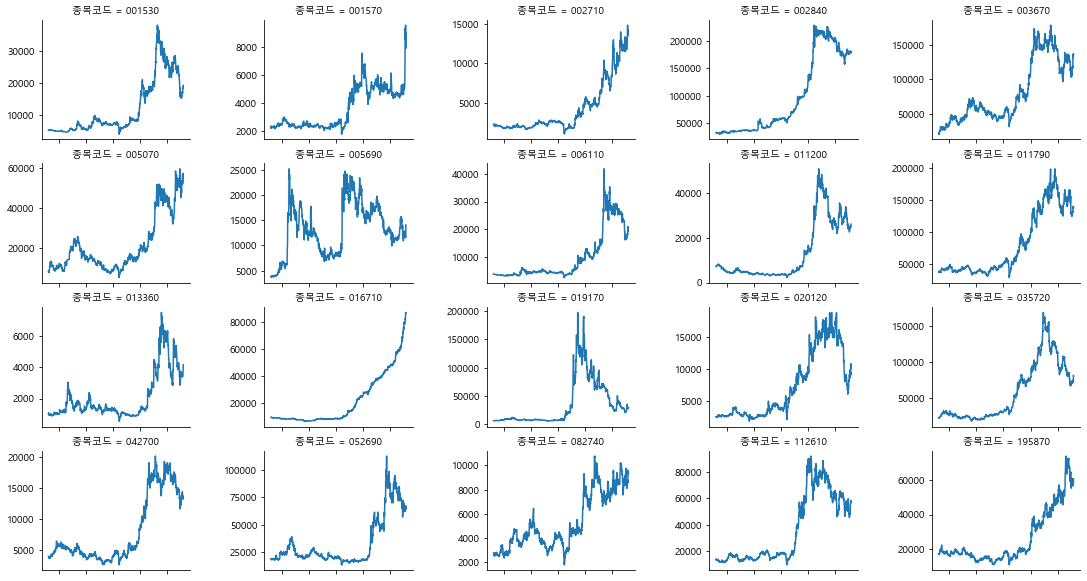

In [219]:
price_momentum = kor_price[kor_price['종목코드'].isin(
    data_bind.loc[momentum_rank <= 20, '종목코드'])]



plt.rc('font', family='Malgun Gothic')
g = sns.relplot(data=price_momentum,
                x='날짜',
                y='종가',
                col='종목코드',
                col_wrap=5,
                kind='line',
                facet_kws={
                    'sharey': False,
                    'sharex': True
                })
g.set(xticklabels=[])
g.set(xlabel=None)
g.set(ylabel=None)
g.fig.set_figwidth(15)
g.fig.set_figheight(8)
plt.subplots_adjust(wspace=0.5, hspace=0.2)
plt.show()

In [225]:
list_momentum = list(price_momentum['종목코드'].unique())

In [237]:
for i, row in data_bind.iterrows():
    if row['종목코드'] in list_momentum:
        print(row['종목코드'], row['종목명'])

001530 DI동일
001570 금양
002710 TCC스틸
002840 미원상사
003670 포스코케미칼
005070 코스모신소재
005690 파미셀
006110 삼아알미늄
011200 HMM
011790 SKC
013360 일성건설
016710 대성홀딩스
019170 신풍제약
020120 키다리스튜디오
035720 카카오
042700 한미반도체
052690 한전기술
082740 HSD엔진
112610 씨에스윈드
195870 해성디에스


### 모멘텀 종목 시각화
- 5분위

In [352]:
price_kospi
ret_kospi = price_kospi.pct_change().cumsum()
ret_kospi.tail()

종목코드,000020,000040,000050,000060,000070,000080,000100,000120,000140,000150,...,363280,372910,373220,375500,377300,378850,381970,383220,383800,402340
날짜,,,,,,,,,,,,,,,,,,,,,
2022-08-01,0.836074,-1.082541,0.114828,0.644446,-0.030707,0.480744,0.717643,-0.225213,0.318508,0.246163,...,-0.319441,-0.679694,-0.135205,-0.342305,-1.000435,-0.680306,0.002594,0.788398,-0.270708,-0.511458
2022-08-02,0.821651,-1.101851,0.110981,0.637114,-0.048251,0.498986,0.708902,-0.233946,0.309997,0.233433,...,-0.324832,-0.676065,-0.141164,-0.353201,-1.003708,-0.680306,0.133029,0.788398,-0.276402,-0.540905
2022-08-03,0.855797,-1.113103,0.103259,0.705061,-0.052372,0.516902,0.701847,-0.216325,0.327165,0.252058,...,-0.322122,-0.681490,-0.093203,-0.350753,-0.949521,-0.674466,0.092305,0.779023,-0.270675,-0.526342
2022-08-04,0.860514,-1.115948,0.118824,0.692613,-0.056510,0.513702,0.732042,-0.220654,0.322945,0.247838,...,-0.316717,-0.666944,-0.079473,-0.350753,-0.799988,-0.668661,0.052211,0.779023,-0.277509,-0.521557
2022-08-05,0.874599,-1.103109,0.130318,0.708019,-0.034349,0.520122,0.737215,-0.225002,0.322945,0.256313,...,-0.300588,-0.659776,-0.072701,-0.327554,-0.813539,-0.661446,0.093980,0.763250,-0.272922,-0.506081


In [258]:
momentum_rank

0      192.0
1      721.0
2      395.0
3      147.0
4      546.0
       ...  
787      NaN
788      NaN
789      NaN
790      NaN
791      NaN
Name: return, Length: 792, dtype: float64

In [284]:
q10 = data_bind['return'].quantile(q=1, interpolation='nearest')
q8=data_bind['return'].quantile(q=0.8, interpolation='nearest')
q6=data_bind['return'].quantile(q=0.6, interpolation='nearest')
q4= data_bind['return'].quantile(q=0.4, interpolation='nearest')
q2 = data_bind['return'].quantile(q=0.2, interpolation='nearest')

In [281]:
momentum_sorted = data_bind.dropna().sort_values(by='return',ascending=False)

In [298]:
momentum_sorted.reset_index(inplace=True)

In [304]:
momentum_sorted[momentum_sorted['return'] == q10]

,level_0,index,종목코드,종목명,return
0,0,422,016710,대성홀딩스,8.466231


In [319]:
momentum_sorted[momentum_sorted['return'] == q10].index[0]
momentum_sorted[momentum_sorted['return'] == q8].index[0]

146

In [333]:
momentum_sorted

,level_0,index,종목코드,종목명,return
0,0,422,016710,대성홀딩스,8.466231
1,1,210,005070,코스모신소재,5.928265
2,2,161,003670,포스코케미칼,5.550847
3,3,116,002710,TCC스틸,4.887484
4,4,123,002840,미원상사,4.512797
...,...,...,...,...,...
725,725,483,027410,BGF,-0.906431
726,726,475,025620,제이준코스메틱,-0.909039
727,727,587,071970,STX중공업,-0.941843
728,728,372,012170,아센디오,-0.944062


In [336]:
momentum_sorted.iloc[1:,:]

,level_0,index,종목코드,종목명,return
1,1,210,005070,코스모신소재,5.928265
2,2,161,003670,포스코케미칼,5.550847
3,3,116,002710,TCC스틸,4.887484
4,4,123,002840,미원상사,4.512797
5,5,245,006110,삼아알미늄,4.125165
...,...,...,...,...,...
725,725,483,027410,BGF,-0.906431
726,726,475,025620,제이준코스메틱,-0.909039
727,727,587,071970,STX중공업,-0.941843
728,728,372,012170,아센디오,-0.944062


In [337]:
momentum_sorted[momentum_sorted['return'] == q2].index[0]

583

In [364]:
q10_8 = momentum_sorted.iloc[momentum_sorted[momentum_sorted['return'] == q10].index[0]:momentum_sorted[momentum_sorted['return'] == q8].index[0],:]
q8_6 = momentum_sorted.iloc[momentum_sorted[momentum_sorted['return'] == q8].index[0]:momentum_sorted[momentum_sorted['return'] == q6].index[0],:]
q6_4 = momentum_sorted.iloc[momentum_sorted[momentum_sorted['return'] == q6].index[0]:momentum_sorted[momentum_sorted['return'] == q4].index[0],:]
q4_2 = momentum_sorted.iloc[momentum_sorted[momentum_sorted['return'] == q4].index[0]:momentum_sorted[momentum_sorted['return'] == q2].index[0],:]
q2_0 = momentum_sorted.iloc[momentum_sorted[momentum_sorted['return'] == q2].index[0]:,:]

In [373]:
q10_8_ticker_list = [i for i in q10_8['종목코드']]
q10_8_ret_sum = ret_kospi[q10_8_ticker_list].sum(axis=1)

q8_6_ticker_list = [i for i in q8_6['종목코드']]
q8_6_ret_sum = ret_kospi[q8_6_ticker_list].sum(axis=1)

q6_4_ticker_list = [i for i in q6_4['종목코드']]
q6_4_ret_sum = ret_kospi[q6_4_ticker_list].sum(axis=1)

q4_2_ticker_list = [i for i in q4_2['종목코드']]
q4_2_ret_sum = ret_kospi[q4_2_ticker_list].sum(axis=1)

q2_0_ticker_list = [i for i in q2_0['종목코드']]
q2_0_ret_sum = ret_kospi[q2_0_ticker_list].sum(axis=1)

In [382]:
momentum_assorted = pd.DataFrame({'q10_8':q10_8_ret_sum, 'q8_6':q8_6_ret_sum, 
                             'q6_4':q6_4_ret_sum, 'q4_2':q4_2_ret_sum, 
                             'q2_0':q2_0_ret_sum})

momentum_assorted

,q10_8,q8_6,q6_4,q4_2,q2_0
날짜,,,,,
2017-08-07,0.000000,0.000000,0.000000,0.000000,0.000000
2017-08-08,0.258636,-0.078226,0.003728,-0.066190,-0.105556
2017-08-09,-1.249776,-1.142925,-1.474088,-0.577328,-1.019016
2017-08-10,-2.349716,-1.733913,-2.307091,-1.176402,-1.755007
2017-08-11,-4.788554,-3.697696,-4.163607,-3.313391,-4.130385
...,...,...,...,...,...
2022-08-01,216.707184,107.203367,49.385961,6.354912,-63.567904
2022-08-02,215.766733,106.794027,48.608567,5.644960,-64.926792
2022-08-03,216.821662,107.728480,49.673542,6.717901,-63.246828


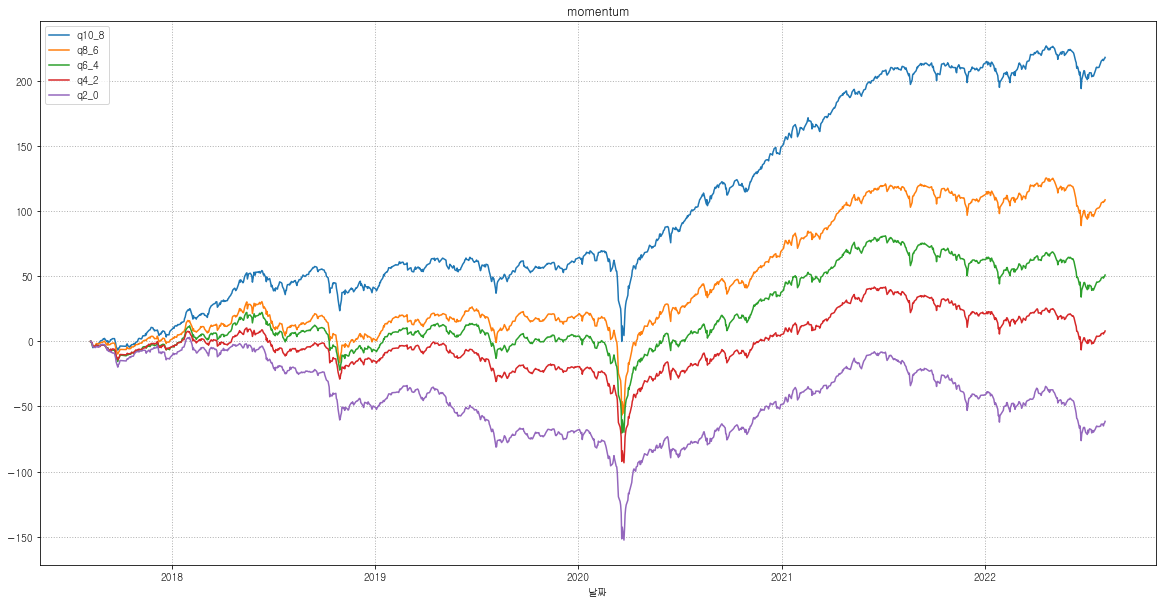

In [392]:
momentum_assorted.plot(legend=True, figsize=(20,10), title ='momentum');
plt.grid(True, color = '0.7', linestyle =':', linewidth=1)
plt.show();